<a href="https://colab.research.google.com/github/AvaniTheCoder/Machine-Learning-Practice/blob/main/Day_9_05_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Inclass Assignment
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

# Create a dictionary with columns for independent variables (features) and a dependent variable
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 75000, 80000, 90000, 95000, 100000, 105000, 110000, 115000],
    'Education_Level': ['Bachelor', 'Master', 'Bachelor', 'Ph.D.', 'Master', 'Bachelor', 'Ph.D.', 'Master', 'Ph.D.', 'Bachelor'],
    'Years_of_Experience': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Job_Satisfaction': [1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Age  Income Education_Level  Years_of_Experience  Job_Satisfaction
0   25   50000        Bachelor                    2                 1
1   30   60000          Master                    4                 0
2   35   75000        Bachelor                    6                 1
3   40   80000           Ph.D.                    8                 0
4   45   90000          Master                   10                 0
5   50   95000        Bachelor                   12                 1
6   55  100000           Ph.D.                   14                 0
7   60  105000          Master                   16                 0
8   65  110000           Ph.D.                   18                 0
9   70  115000        Bachelor                   20                 1


In [ ]:
#Split the dataset into training and testing sets
X = df[['Age','Income','Years_of_Experience']]
y = df['Job_Satisfaction']

# Split the data into training and testing sets
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Initialize and train a inear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report")
print(report)

Accuracy: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import pandas as pd

#Define data for each column
size = [1500,1800,2000,2200,2500] #Sq ft
num_bedrooms = [3,4,3,4,4] #Number of bedrooms
num_bathrooms = [2,3,2,3,2]
year_built = [1995,2000,2010,2005,1998]
distance_to_city_center = [5,8,10,12,6]

#Calculate the price based on the given formula(Without random noise)
price = [1000 *size[i] + 5000 * num_bedrooms[i] + 3000 *num_bathrooms[i] - 100 *(2023-year_built[i]) for i in range(len(size))]

#Create a dataframe
data = pd.DataFrame({
    'Size (sqft)': size,
    'Bedrooms':num_bedrooms,
    'Bathrooms':num_bathrooms,
    'Year_Built':year_built,
    'Distance to City Center (miles)':distance_to_city_center,
    'Price($)':price
})

data

,Size (sqft),Bedrooms,Bathrooms,Year_Built,Distance to City Center (miles),Price($)
0,1500,3,2,1995,5,1518200
1,1800,4,3,2000,8,1826700
2,2000,3,2,2010,10,2019700
3,2200,4,3,2005,12,2227200
4,2500,4,2,1998,6,2523500


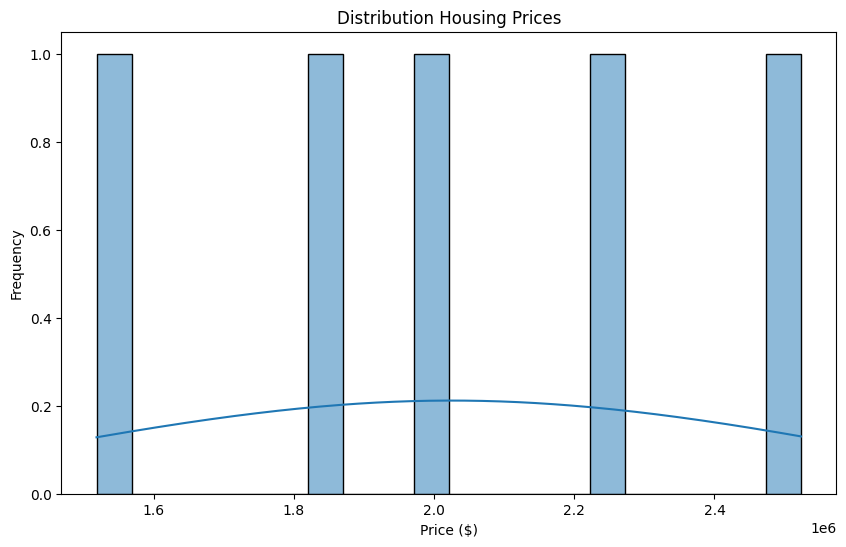

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of housing prices
plt.figure(figsize=(10,6))
sns.histplot(data['Price($)'], bins=20,kde=True)
plt.title('Distribution Housing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

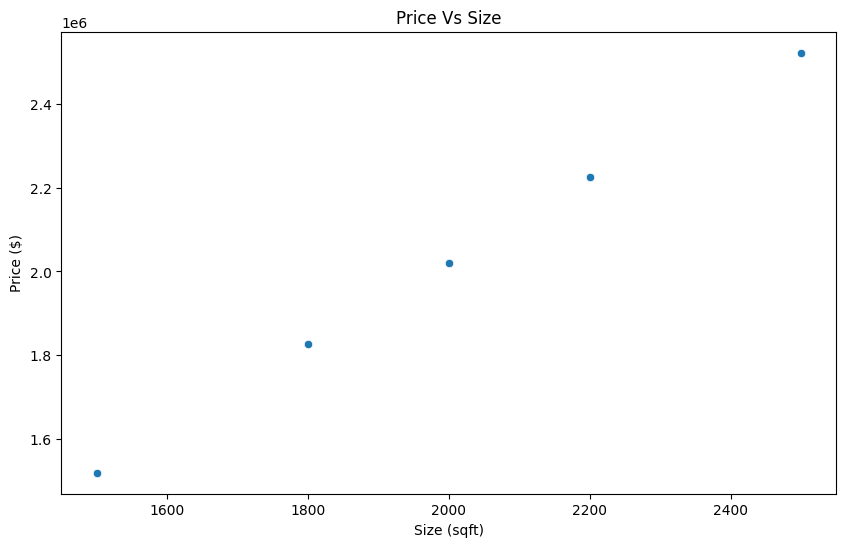

In [ ]:
#Scatter plot Price vs Size
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size (sqft)',y='Price($)',data=data)
plt.title('Price Vs Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.show()

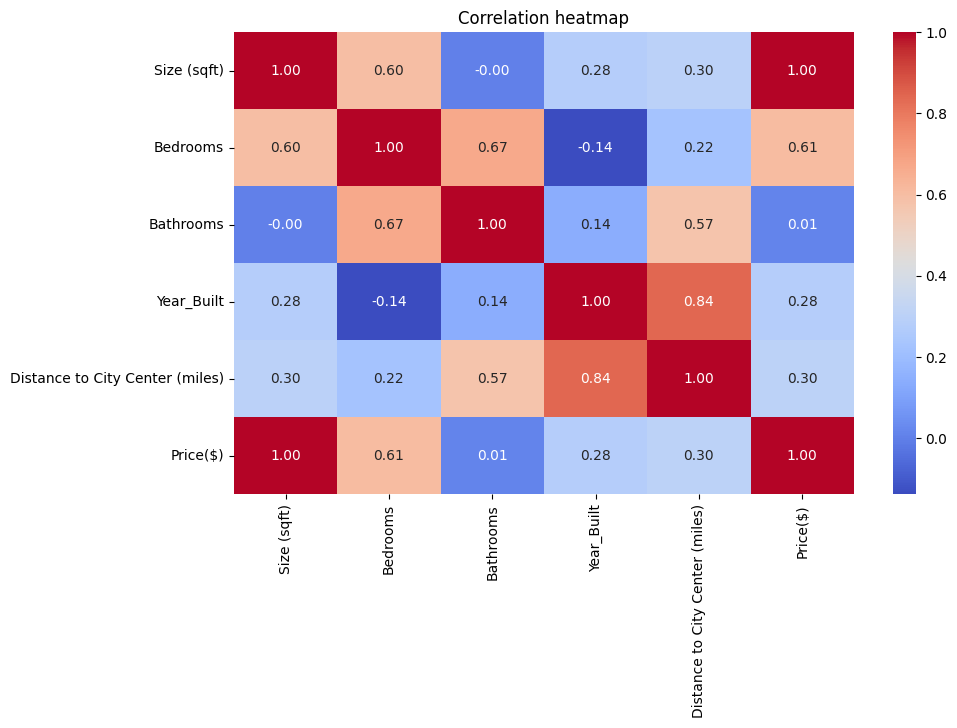

In [ ]:
#Corerelation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

#Split the dataset into training and testing sets
X = data[['Size (sqft)','Bedrooms','Bathrooms','Year_Built','Distance to City Center (miles)']]
y = data['Price($)']

# Split the data into training and testing sets
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Initialize and train a inear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print(f"Mean Squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared error: 37249000000.00
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
import numpy as np
#input for new home

new_home = np.array([[2500,3,2,2010,10]])

#Predict the price using trained model
predicted_price = model.predict(new_home)

#Display the predicted price
print(f'The predicted price for new home is ${predicted_price[0]:.2f}')

The predicted price for new home is $2523500.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
 #Create data frame by yourself with 6 columns and 5 rows with corelated data ,make heaatmap and do linear regression and logistic reagression and the print accuracy.

In [ ]:
#Assignement

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Create a dictionary with the data
data = {
    'Study_Hours': [3, 6, 2, 7, 4],
    'Preparation_Time(in hours)': [3, 4, 2, 5, 2],
    'Attendance(%)': [90, 95, 85, 92, 78],
    'Sleep_Hours': [7, 8, 6, 9, 5],
    'Stress_Level (1-10)': [3, 2, 5, 1, 6],
    'Exam_Score': [85, 92, 78, 95, 88]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Study_Hours  Preparation_Time(in hours)  Attendance(%)  Sleep_Hours  \
0            3                           3             90            7   
1            6                           4             95            8   
2            2                           2             85            6   
3            7                           5             92            9   
4            4                           2             78            5   

   Stress_Level (1-10)  Exam_Score  
0                    3          85  
1                    2          92  
2                    5          78  
3                    1          95  
4                    6          88  


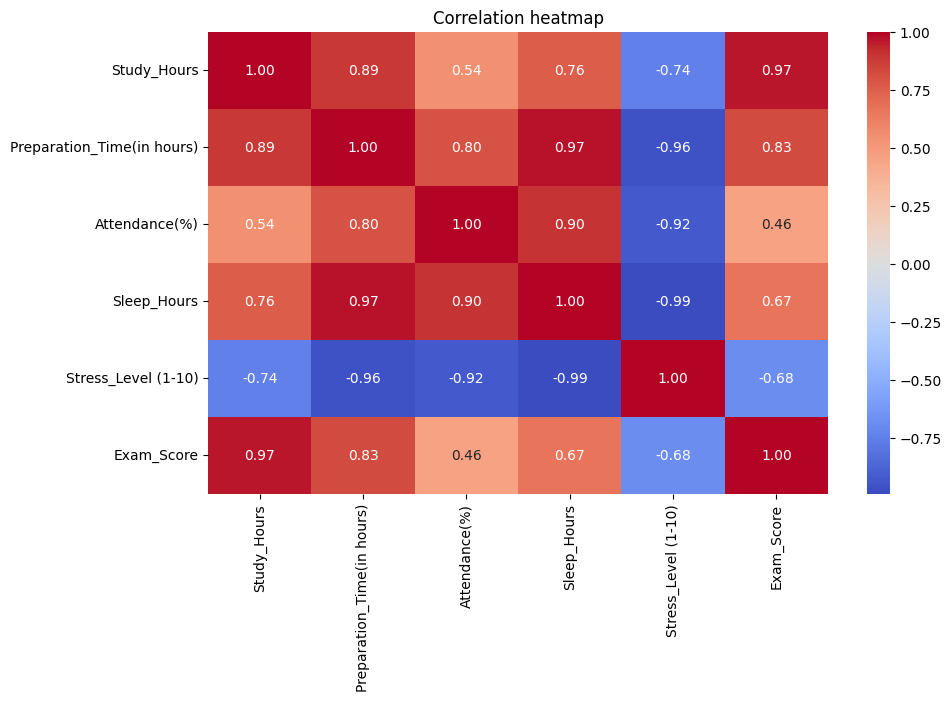

In [ ]:
#Corerelation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
#'Preparation_Time(in hours)','Attendance(%)','Sleep_Hours','Stress_Level (1-10)'

In [ ]:
#Split the dataset into training and testing sets
X = df[['Study_Hours','Preparation_Time(in hours)','Attendance(%)','Sleep_Hours','Stress_Level (1-10)']]
y = df['Exam_Score']

# Split the data into training and testing sets
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Initialize and train a inear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
#accuracy = accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


#print(f"Accuracy {accuracy}")
print(f"Mean Squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared error: 9.00
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#Split the dataset into training and testing sets
X = df[['Study_Hours','Preparation_Time(in hours)','Attendance(%)','Sleep_Hours','Stress_Level (1-10)']]
y = df['Exam_Score']

# Split the data into training and testing sets
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Initialize and train a inear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
#accuracy = accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


#print(f"Accuracy {accuracy}")
print(f"Mean Squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared error: 0.03
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
